In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Housing.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
print(data.describe().astype('int'))

data['zipcode'].nunique()

               id    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
count       21613    21613     21613      21613        21613     21613   
mean   4580306147   540088         3          2         2079     15106   
std    2876569751   367126         0          0          918     41420   
min       1000102    75000         0          0          290       520   
25%    2123049194   321950         3          1         1427      5040   
50%    3904930410   450000         3          2         1910      7618   
75%    7308900445   645000         4          2         2550     10688   
max    9900000190  7700000        33          8        13540   1651359   

       floors  waterfront   view  condition  grade  sqft_above  sqft_basement  \
count   21613       21613  21613      21613  21613       21613          21613   
mean        1           0      0          3      7        1788            291   
std         0           0      0          0      1         828            442   
min      

70

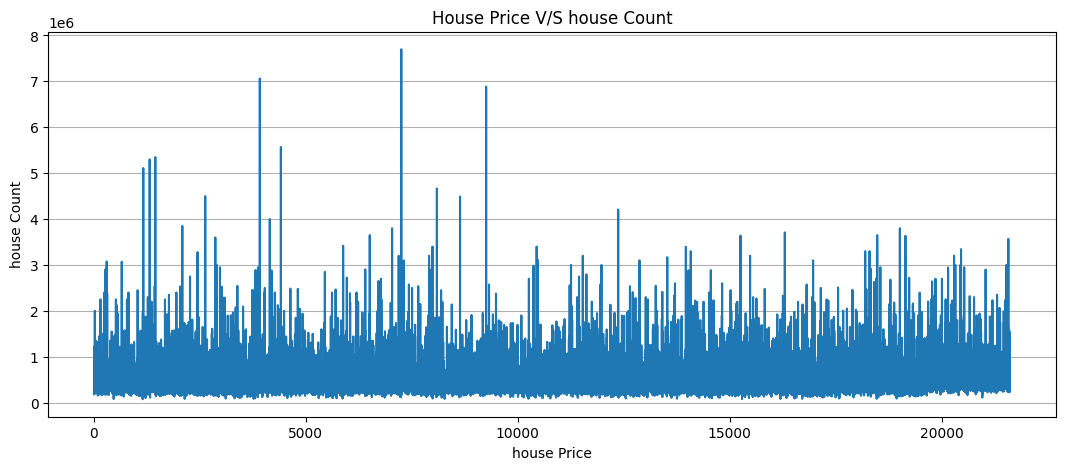

In [4]:
plt.figure(figsize=(13, 5))
plt.plot(data['price'])
# plt.bar(data.index, data['price'], color='skyblue', label='Price')
plt.xlabel('house Price')
plt.ylabel('house Count')
plt.title('House Price V/S house Count')
plt.grid(axis='y')
plt.show()

[  75000.  837500. 1600000. 2362500. 3125000. 3887500. 4650000. 5412500.
 6175000. 6937500. 7700000.]


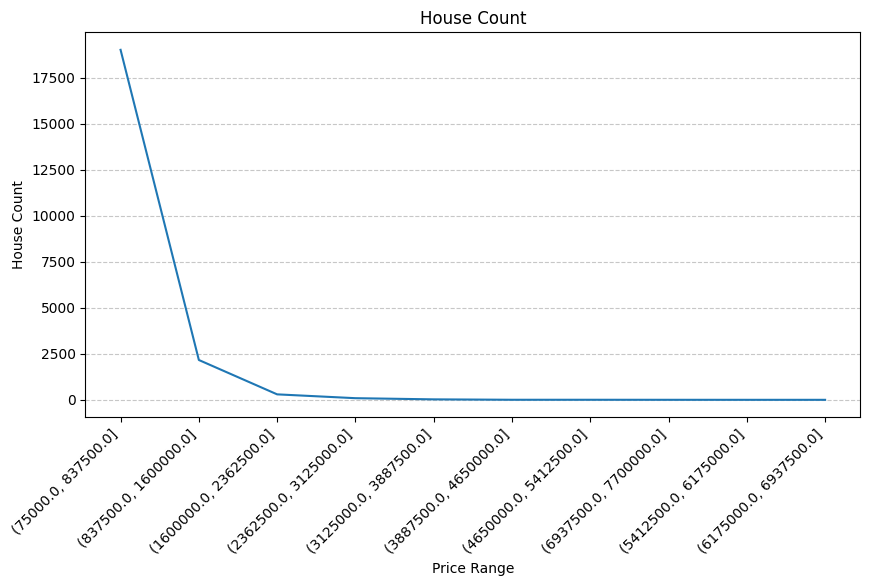

In [5]:
num_bin = 10
strt_bin = data['price'].min()
stop_bin = data['price'].max()
bins = np.linspace(strt_bin, stop_bin, num_bin + 1)
print(bins)
data['price_range'] = pd.cut(data['price'],bins = bins)
val_cnt=  data['price_range'].value_counts()


plt.figure(figsize=(10, 5))
plt.plot(val_cnt.index.astype(str), val_cnt.values)
plt.xlabel('Price Range')
plt.xticks(rotation=45, ha="right")
plt.ylabel('House Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('House Count')
plt.show()


Here from the graph we need to apply the normlization trechnique.

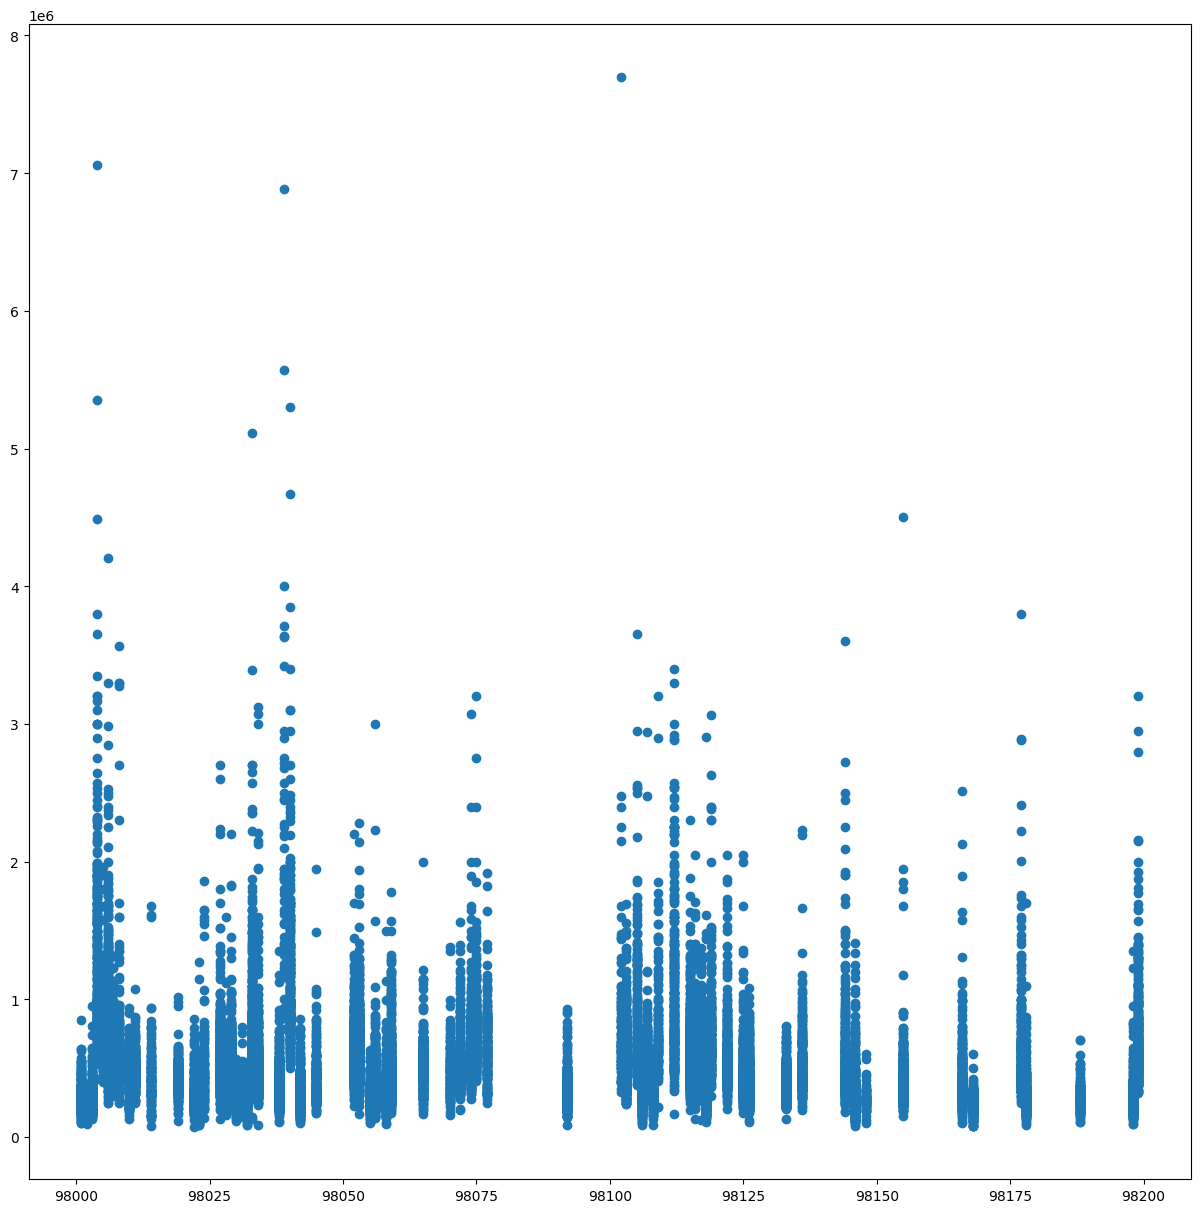

In [6]:
plt.figure(figsize=(15, 15))
plt.scatter(data['zipcode'],data['price'])


In [7]:
data['zipcode'].value_counts()

,count
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
...,...
98102,105
98010,100
98024,81


In [8]:
dt = data.isnull().any(axis=1)
data[dt]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,670,0,1966,0,98022,47.2638,-121.906,1160,42882,NaN


Here we have only one row where we are having one Null value.

In [9]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_range'],
      dtype='object')

In [10]:
data[['id','date','price','bedrooms','bathrooms','sqft_living','zipcode']].head(1000)

,id,date,price,bedrooms,bathrooms,sqft_living,zipcode
0,7229300521,20141013T000000,231300.0,2,1.00,1180,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,98074
...,...,...,...,...,...,...,...
995,7437100570,20140821T000000,291000.0,4,2.50,1860,98038
996,8856004730,20140917T000000,199950.0,2,2.75,1590,98001
997,3856902996,20140804T000000,553500.0,2,1.00,850,98105
998,1442800370,20150415T000000,189950.0,2,1.00,1030,98038


In [11]:
data.groupby('zipcode').agg(
                                          mean_p = ('price','mean'),
                                          count_p = ('price','count')
).astype(int)

,mean_p,count_p
zipcode,,
98001,280804,362
98002,234284,199
98003,294111,280
98004,1355927,317
98005,810164,168
...,...,...
98177,676185,255
98178,310648,262
98188,289078,136


In [12]:
data['price'].max() #7700000.0

data[data['price'] == 7700000.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,"(6937500.0, 7700000.0]"


In [13]:
pd.DataFrame(data.groupby('zipcode')['price'].count().astype(int)).sort_values('price',ascending=False)

,price
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
...,...
98102,105
98010,100
98024,81


In [14]:
data.dropna(inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
import seaborn as sns


x = data.drop(['price','price_range','date'], axis=1)
y = data['price']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10497,9414500200,4,1.75,1790,11875,1.0,0,0,4,7,1490,300,1969,0,98027,47.5220,-122.047,1870,11760
5350,7883603190,3,1.00,1320,5750,1.5,0,0,3,7,1320,0,1913,0,98108,47.5288,-122.325,1010,5700
9799,3918400013,3,2.25,1460,941,3.0,0,0,3,8,1460,0,2006,0,98133,47.7145,-122.356,1490,1399
21288,3630200430,3,2.75,2470,3600,2.0,0,0,3,9,2470,0,2007,0,98029,47.5406,-121.994,2570,3600
5330,114100314,3,1.50,1480,7117,1.0,0,0,3,7,1170,310,1960,0,98028,47.7766,-122.248,2230,14775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,9346930100,4,2.50,2440,9350,1.0,0,0,4,8,1560,880,1976,0,98006,47.5614,-122.130,2260,8500
11154,685000160,4,1.75,2520,8442,1.0,0,0,4,7,1640,880,1953,0,98004,47.6317,-122.205,2110,8442
16531,7950303530,4,2.00,2060,3060,2.0,0,0,3,7,2060,0,1968,0,98118,47.5631,-122.285,1630,3766
4345,1796361140,3,1.75,1340,8250,1.0,0,0,3,7,1100,240,1985,0,98042,47.3668,-122.090,1540,7860


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

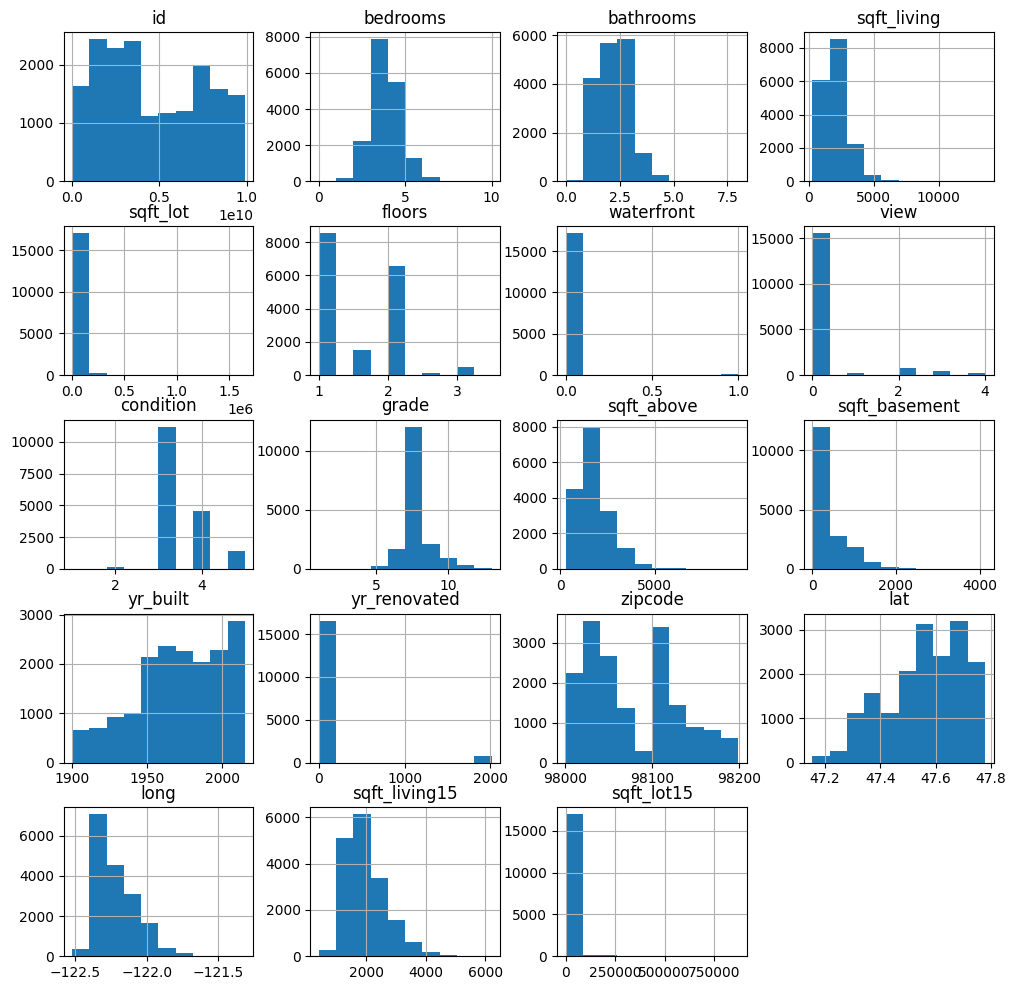

In [18]:
x_train.hist(figsize=(12,12))

In [19]:
x_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001592,0.008313,-0.013424,-0.130807,0.017810,-0.006302,0.008410,-0.024753,0.005837,-0.011801,-0.005791,0.027691,-0.022213,-0.009304,0.000046,0.018724,-0.003152,-0.138178
bedrooms,0.001592,1.000000,0.528738,0.591639,0.036379,0.182380,-0.010214,0.081408,0.031411,0.366177,0.490075,0.311618,0.155243,0.020206,-0.157793,-0.010675,0.132652,0.402209,0.031204
bathrooms,0.008313,0.528738,1.000000,0.753020,0.083056,0.504549,0.057206,0.185968,-0.127469,0.665825,0.684998,0.281649,0.509378,0.047852,-0.197715,0.024599,0.219761,0.568152,0.084512
sqft_living,-0.013424,0.591639,0.753020,1.000000,0.169434,0.356095,0.103399,0.288489,-0.058021,0.763362,0.877390,0.434615,0.318744,0.057183,-0.196160,0.052489,0.236275,0.759279,0.183170
sqft_lot,-0.130807,0.036379,0.083056,0.169434,1.000000,-0.004860,0.022306,0.077020,-0.008516,0.109603,0.179069,0.016556,0.047212,0.009069,-0.126004,-0.083789,0.225558,0.146359,0.712694
floors,0.017810,0.182380,0.504549,0.356095,-0.004860,1.000000,0.028326,0.037215,-0.265999,0.458566,0.524052,-0.242475,0.489080,0.006542,-0.056093,0.050198,0.126431,0.281132,-0.010395
waterfront,-0.006302,-0.010214,0.057206,0.103399,0.022306,0.028326,1.000000,0.402244,0.014795,0.083659,0.073823,0.076659,-0.023856,0.098619,0.031831,-0.014788,-0.044474,0.086858,0.031922
view,0.008410,0.081408,0.185968,0.288489,0.077020,0.037215,0.402244,1.000000,0.049419,0.251808,0.175088,0.271854,-0.050479,0.108693,0.088882,0.006309,-0.079770,0.282728,0.076246
condition,-0.024753,0.031411,-0.127469,-0.058021,-0.008516,-0.265999,0.014795,0.049419,1.000000,-0.145328,-0.160520,0.180543,-0.366309,-0.059670,0.004288,-0.014180,-0.112973,-0.094666,-0.004491
grade,0.005837,0.366177,0.665825,0.763362,0.109603,0.458566,0.083659,0.251808,-0.145328,1.000000,0.754863,0.172029,0.447906,0.016947,-0.179584,0.116726,0.197281,0.715116,0.116919


In [20]:
train_data = x_train.join(y_train)
train_data

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
10497,9414500200,4,1.75,1790,11875,1.0,0,0,4,7,1490,300,1969,0,98027,47.5220,-122.047,1870,11760,410000.0
5350,7883603190,3,1.00,1320,5750,1.5,0,0,3,7,1320,0,1913,0,98108,47.5288,-122.325,1010,5700,279000.0
9799,3918400013,3,2.25,1460,941,3.0,0,0,3,8,1460,0,2006,0,98133,47.7145,-122.356,1490,1399,337000.0
21288,3630200430,3,2.75,2470,3600,2.0,0,0,3,9,2470,0,2007,0,98029,47.5406,-121.994,2570,3600,773000.0
5330,114100314,3,1.50,1480,7117,1.0,0,0,3,7,1170,310,1960,0,98028,47.7766,-122.248,2230,14775,285000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,9346930100,4,2.50,2440,9350,1.0,0,0,4,8,1560,880,1976,0,98006,47.5614,-122.130,2260,8500,610000.0
11154,685000160,4,1.75,2520,8442,1.0,0,0,4,7,1640,880,1953,0,98004,47.6317,-122.205,2110,8442,770000.0
16531,7950303530,4,2.00,2060,3060,2.0,0,0,3,7,2060,0,1968,0,98118,47.5631,-122.285,1630,3766,400000.0
4345,1796361140,3,1.75,1340,8250,1.0,0,0,3,7,1100,240,1985,0,98042,47.3668,-122.090,1540,7860,230000.0


<Axes: >

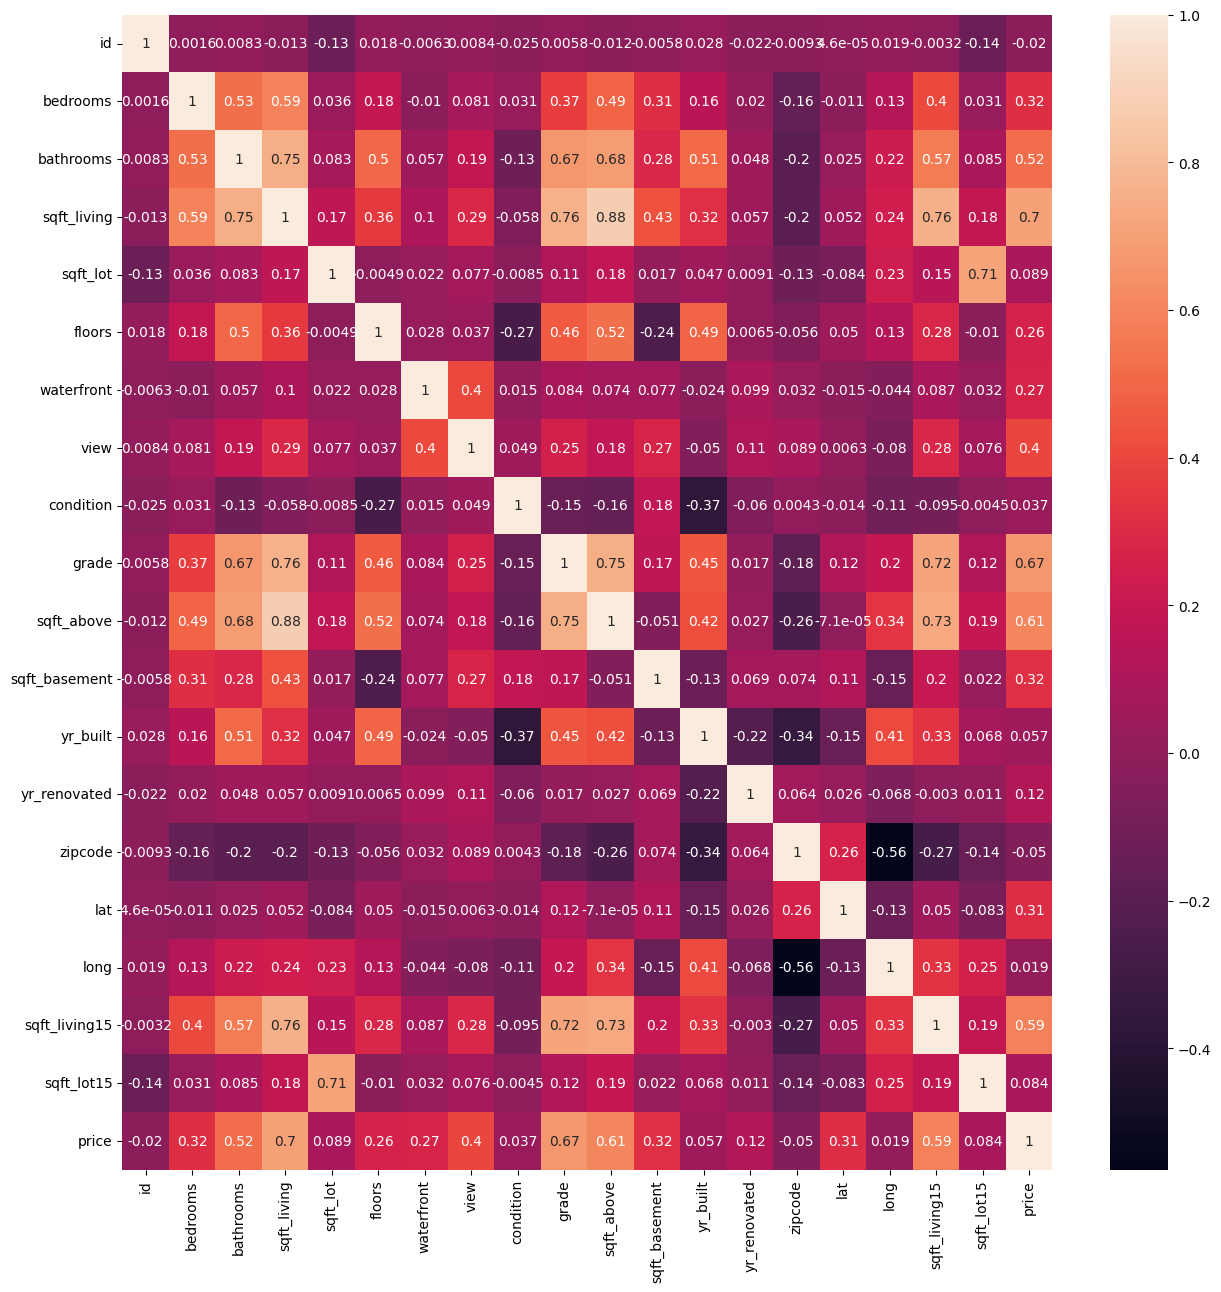

In [21]:

plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)